# 2D example

In [1]:
import sys
import watershed3d
from skimage.morphology import watershed
import matplotlib as mpl
from skimage.measure import regionprops
import pandas as pd
import tifffile as tiff
from matplotlib.pylab import imshow, plot, subplots, hist, scatter, bar, step

load file 

In [2]:
filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/MAX_UFO20150807_stitched001_T0162_c1.tif'
w = watershed3d.Ws3d(filename)

image is two-dimensional


check histogram of image data

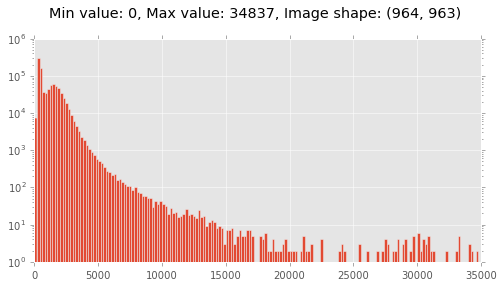

In [3]:
w.intensity_histogram()

load Ilastik probability mask and plot it

In [4]:
w.load_mask(prob=0.5)
# w.plot_probability_map(21)

shape (964, 963) (964, 963)
loaded probability map


do segmentation without the object classifier

In [5]:
w.segment(do_not_use_object_classifier=1, sigma=(3,3), min_distance=2)

len rp= 927
segmentation done, found 929 cells


show segmentation

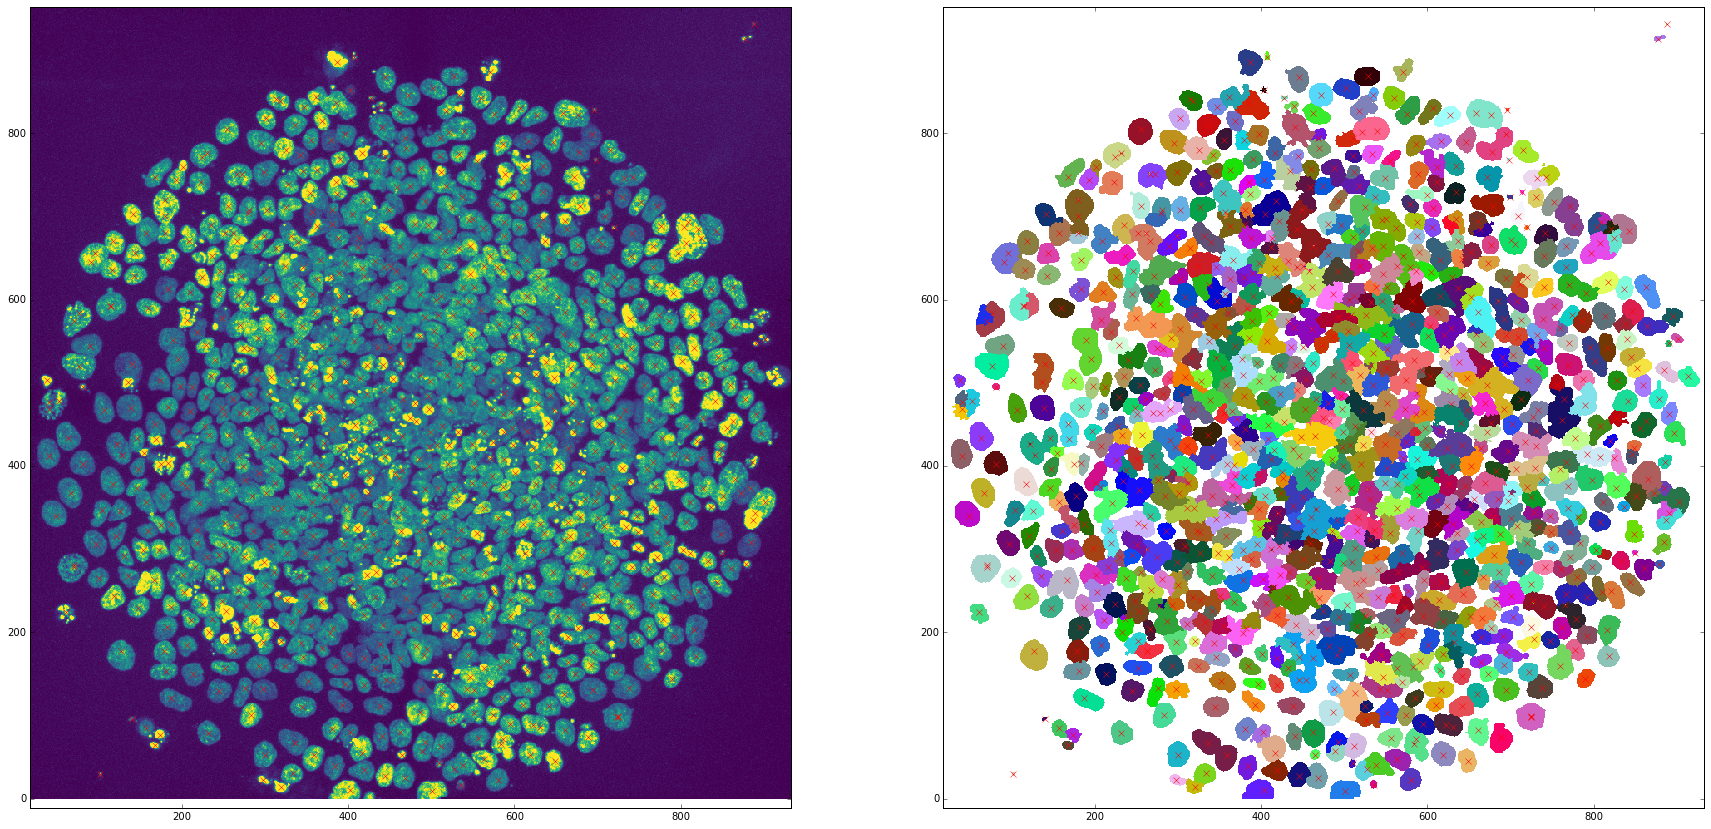

In [6]:
w.show_segmentation(figsize=(30,20))

In [7]:
w.df.head()

,area,total_intensity,mean_intensity,centroid
cell_id,,,,
1,738,1814197.0,2458.261518,"[10.1327913279, 501.149051491]"
2,732,1907503.0,2605.878415,"[9.74453551913, 397.637978142]"
3,282,2217604.0,7863.843972,"[14.3546099291, 319.397163121]"
4,71,86978.0,1225.042254,"[17.2816901408, 535.591549296]"
5,555,808003.0,1455.861261,"[22.5621621622, 579.742342342]"


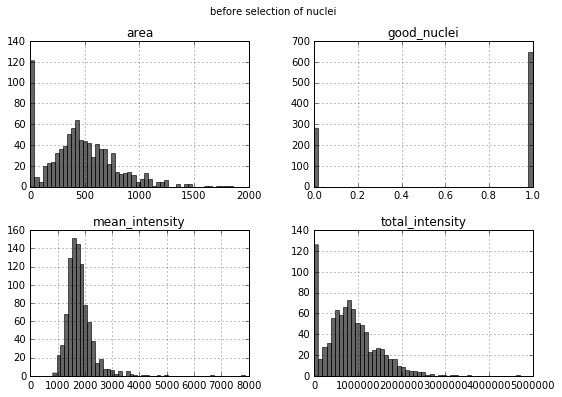

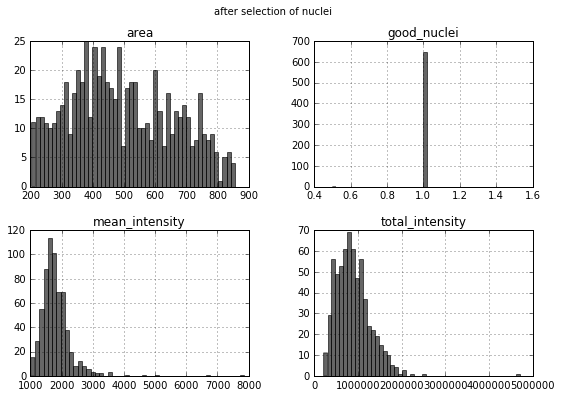

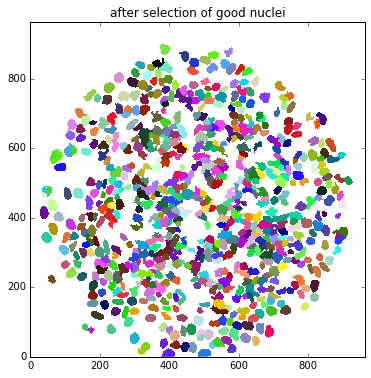

In [8]:
w.select_nuclei(quantiles=[0.2,0.9], plot=1)

apply to other channels

In [9]:
filename_bra = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/MAX_UFO20150807_stitched001_T0162_c3.tif'
filename_sox17 = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/MAX_UFO20150807_stitched001_T0162_c2.tif'
filename_sox2 = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/MAX_UFO20150807_stitched001_T0162_c4.tif'

example of background subtraction

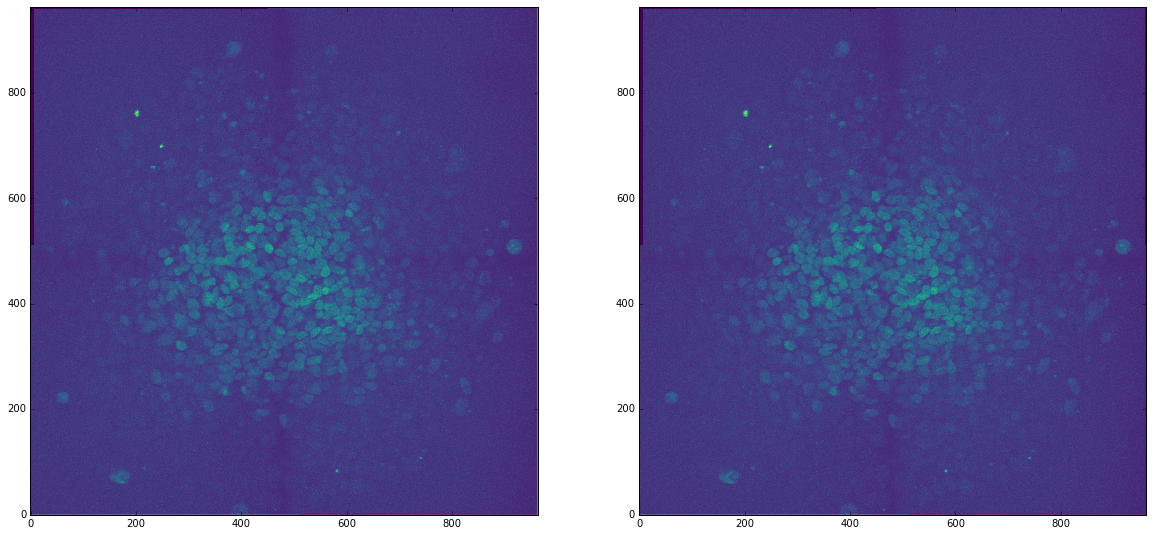

In [10]:
s2=tiff.imread(filename_sox2)
_,ax=subplots(1,2, figsize=(20,10))
ax[0].imshow(s2, cmap='viridis', origin='lower')
ax[1].imshow(w.remove_background(s2), cmap='viridis', origin='lower')

In [11]:
w.apply_to_channels(filename_sox2, 'sox2')
w.apply_to_channels(filename_bra, 'bra')
w.apply_to_channels(filename_sox17, 'sox17')

len rp= 927
len rp= 927
len rp= 927


In [12]:
# w.df.drop('good_nuclei', axis=1, inplace=1)

In [13]:
w.df.head()
# w.good_nuclei.head()

,area,total_intensity,mean_intensity,centroid,good_nuclei,sox2,bra,sox17
cell_id,,,,,,,,
1,738,1814197.0,2458.261518,"[10.1327913279, 501.149051491]",True,100582.52,60157.50,35939.44
2,732,1907503.0,2605.878415,"[9.74453551913, 397.637978142]",True,184398.28,59353.00,36882.16
3,282,2217604.0,7863.843972,"[14.3546099291, 319.397163121]",True,46536.28,27933.50,16298.16
4,71,86978.0,1225.042254,"[17.2816901408, 535.591549296]",False,14549.34,8640.75,4753.98
5,555,808003.0,1455.861261,"[22.5621621622, 579.742342342]",True,91454.70,54886.75,31690.90


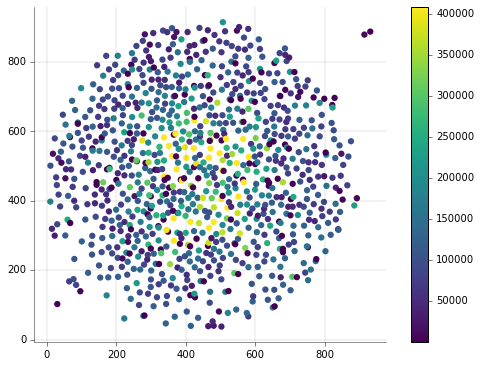

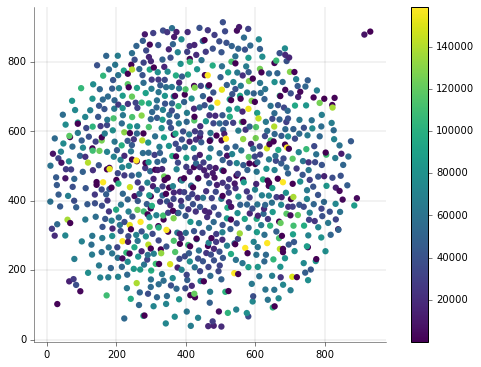

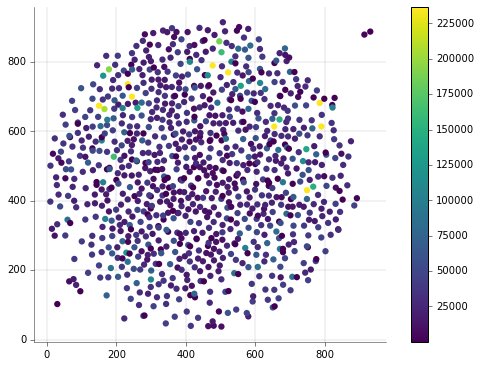

In [19]:
w.dot_plot('sox2', colormap_cutoff=0.5)
w.dot_plot('bra', colormap_cutoff=0.7)
w.dot_plot('sox17', colormap_cutoff=0.4)

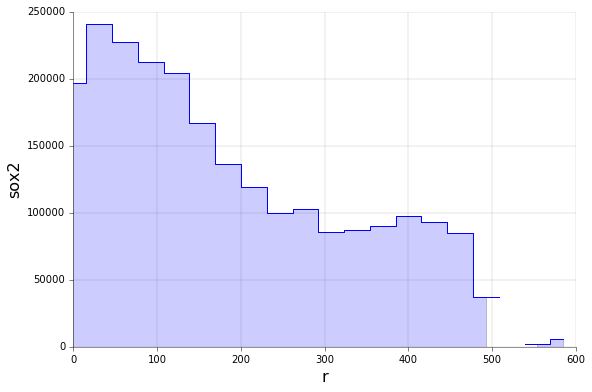

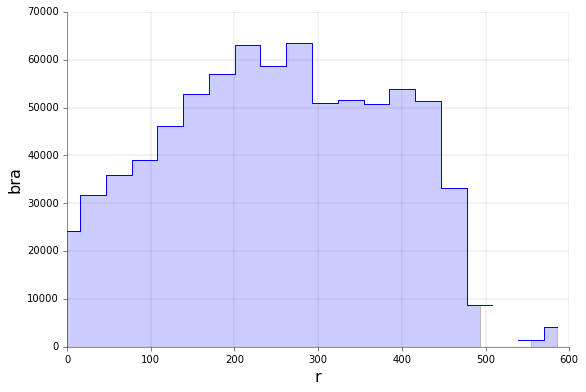

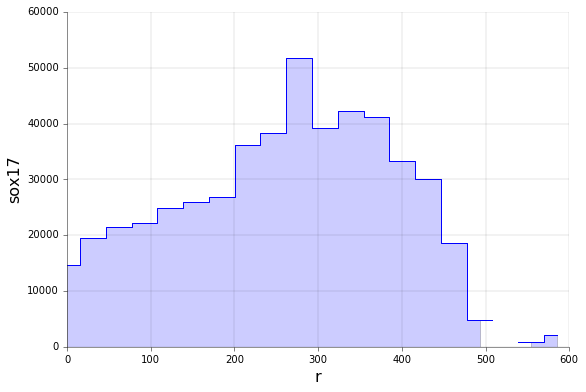

In [21]:
w.radial_profile_per_cell('sox2',20, only_selected_cells=0);
w.radial_profile_per_cell('bra',20, only_selected_cells=0);
w.radial_profile_per_cell('sox17',20, only_selected_cells=0);

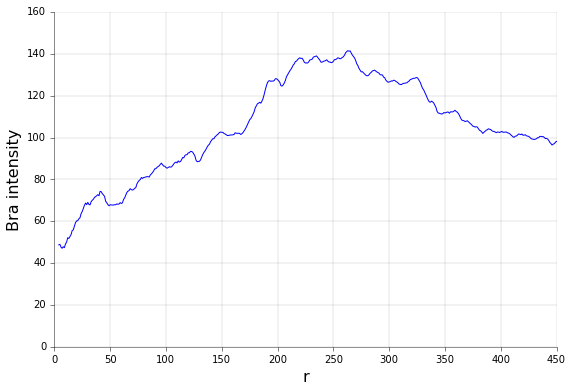

In [22]:
r,rs = w.radial_intensity('bra', only_selected_nuclei=1, plot=False)
fig,ax=subplots()
ax.plot(r,pd.DataFrame(rs).rolling(5).mean())
ax.set_xlim([0,450])
ax.set_xlabel('r', fontsize=16)
ax.set_ylabel('Bra intensity', fontsize=16)
w.nice_spines(ax)

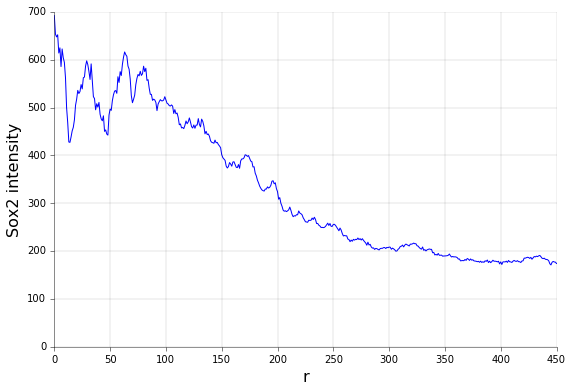

In [23]:
r,rs = w.radial_intensity('sox2', only_selected_nuclei=1, plot=False)
fig,ax=subplots()
ax.plot(r,rs)
ax.set_xlim([0,450])
ax.set_xlabel('r', fontsize=16)
ax.set_ylabel('Sox2 intensity', fontsize=16)
w.nice_spines(ax)

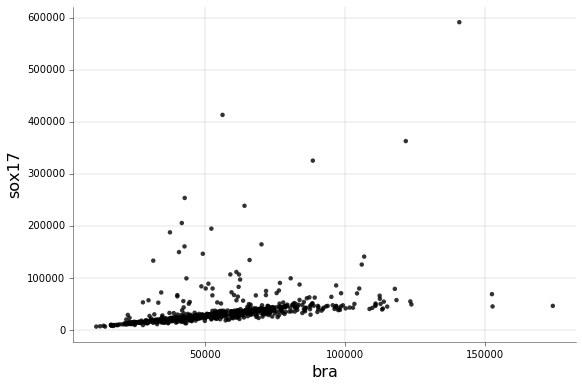

In [24]:
w.coexpression_per_cell('bra', 'sox17', only_selected_cells=1)

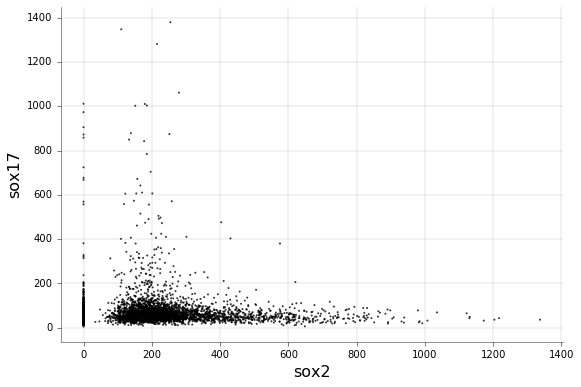

In [25]:
w.coexpression_per_pixel('sox2', 'sox17', downsample=100, only_selected_cells=0)